In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data

In [3]:
data_clean = pd.read_csv(r'D:\spring 25\appiled stat\anika Sprint 1\data\Processed\data_clean.csv')
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Seattle, WA - Tucson, AZ","route_Seattle, WA - Washington, DC (Metropolitan Area)","route_St. Louis, MO - Tampa, FL (Metropolitan Area)","route_St. Louis, MO - Washington, DC (Metropolitan Area)","route_Syracuse, NY - Tampa, FL (Metropolitan Area)","route_Syracuse, NY - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL"
0,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
1,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
2,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
4,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


### Predict popular route

In [4]:
route_y = data_clean['cur_passengers']

# Get route columns automatically
route_cols = [col for col in data_clean.columns if col.startswith('route_')]

# Add other useful features
feature_cols = ['Year', 'quarter', 'ly_passengers', 'cur_fare', 'ly_fare',
                'amount_change', 'percent_change', 'percent_change_pax'] + route_cols

route_X = data_clean[feature_cols]


In [5]:
route_X_train, route_X_test, route_y_train, route_y_test = train_test_split(route_X, route_y, test_size=0.2, random_state=42)

pr = LinearRegression()
pr.fit(route_X_train, route_y_train)

LinearRegression()

In [6]:
data_clean['predicted_passengers'] = pr.predict(route_X)

#### Top 10 most routes

In [7]:
# Step 1: Extract only the route columns and predicted passengers
route_df = data_clean[route_cols + ['predicted_passengers']].copy()

# Step 2: Melt the one-hot encoded routes
route_melted = route_df.melt(id_vars='predicted_passengers', var_name='route', value_name='is_route')

# Step 3: Filter for actual route rows (where route flag = 1)
route_melted = route_melted[route_melted['is_route'] == 1]

# Step 4: Group and average predicted passengers by route
popular_routes = route_melted.groupby('route')['predicted_passengers'].mean().sort_values(ascending=False)


# Display top 10 most popular routes
print(popular_routes.head(10))


route
route_Los Angeles, CA (Metropolitan Area) - San Francisco, CA (Metropolitan Area)      1.572398e+06
route_Miami, FL (Metropolitan Area) - New York City, NY (Metropolitan Area)            1.484395e+06
route_New York City, NY (Metropolitan Area) - Orlando, FL                              8.932600e+05
route_Los Angeles, CA (Metropolitan Area) - Seattle, WA                                7.361317e+05
route_New York City, NY (Metropolitan Area) - San Francisco, CA (Metropolitan Area)    7.111618e+05
route_Chicago, IL - New York City, NY (Metropolitan Area)                              6.962152e+05
route_Las Vegas, NV - Los Angeles, CA (Metropolitan Area)                              6.462600e+05
route_Chicago, IL - Los Angeles, CA (Metropolitan Area)                                5.846179e+05
route_San Diego, CA - San Francisco, CA (Metropolitan Area)                            5.821350e+05
route_Las Vegas, NV - San Francisco, CA (Metropolitan Area)                            5.76362

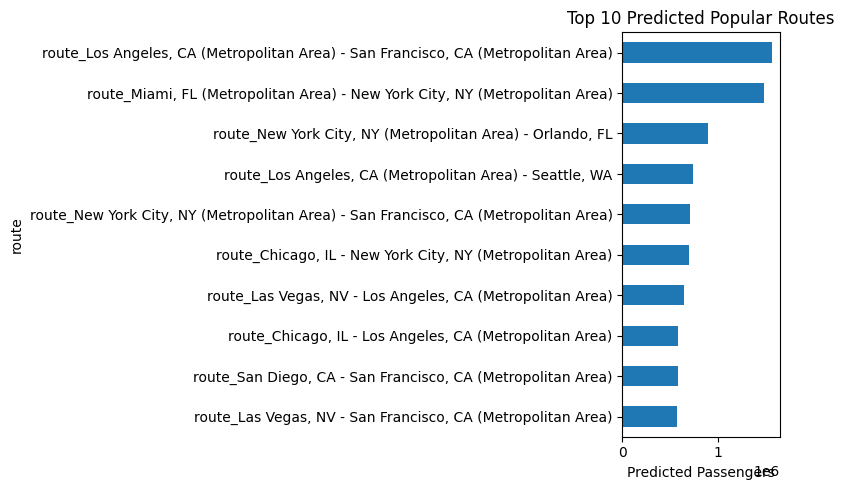

In [ ]:
popular_routes.head(10).plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.xlabel("Predicted Passengers")
plt.title("Top 10 Predicted Popular Routes")
plt.tight_layout()
plt.show()


#### Top 10 Least popular routes

In [18]:
not_popular_routes = route_melted.groupby('route')['predicted_passengers'].mean().sort_values(ascending=True)
# Display top 10 least popular routes   
print(not_popular_routes.head(10))

route
route_Denver, CO - Greenville/Spartanburg, SC                 2529.999997
route_Pittsburgh, PA - Punta Gorda, FL                        3249.999980
route_Medford, OR - Seattle, WA                               4634.999809
route_El Paso, TX - San Diego, CA                             6050.000002
route_Fayetteville, AR - Valparaiso, FL                       6379.999983
route_Cleveland, OH (Metropolitan Area) - Myrtle Beach, SC    6400.000002
route_Charleston, SC - Miami, FL (Metropolitan Area)          7359.999994
route_Tampa, FL (Metropolitan Area) - Toledo, OH              7380.000010
route_Las Vegas, NV - Stockton, CA                            7409.999984
route_Missoula, MT - Phoenix, AZ                              7439.999986
Name: predicted_passengers, dtype: float64


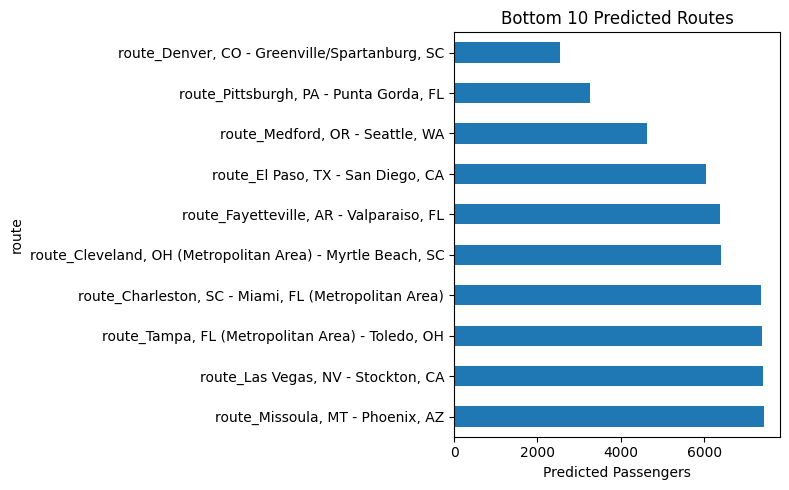

In [20]:
not_popular_routes.head(10).plot(kind='barh', figsize=(8,5))
plt.gca().invert_yaxis()
plt.xlabel("Predicted Passengers")
plt.title("Bottom 10 Predicted Routes")
plt.tight_layout()
plt.show()


### Accuracy

In [ ]:
#find r2 score
from sklearn.metrics import r2_score
r2 = r2_score(route_y_test, pr.predict(route_X_test))   
print(f"R^2 Score: {r2:.4f}")

R^2 Score: 0.9799
